In [1]:
import sys
import os
import numpy as np
import cv2 as cv

import matplotlib.pyplot as plt

In [2]:
sys.path.append(os.path.join(os.path.dirname(os.getcwd()),"modules"))

In [3]:
import NbrRegionSegment as seg


In [4]:
img = cv.imread("1.jpg")

In [5]:
img = cv.resize(img, (0,0), fx = 0.5, fy = 0.5)

In [6]:
# img = cv.medianBlur(img, 3)

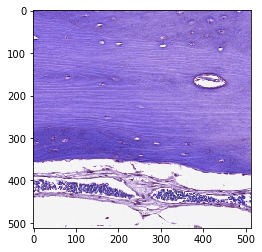

In [7]:
plt.imshow(img)

In [9]:
res, reg = seg.RegionExtract(img, 10, True)

Time to segment =  0.447831392288208


In [10]:
np.max(reg)

156914

In [13]:
res2 = seg.RemoveBG(img, 10, 100, True)

Time to Remove BG =  0.5075287818908691


ValueError: too many values to unpack (expected 2)

In [12]:
plt.imshow(res2)

NameError: name 'res2' is not defined